In [ ]:
pip install numpy scipy pyAudioAnalysis eyed3 pydub hdbscan noisereduce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 96.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 12.3 MB/s eta 0:00:00
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264372 sha256=c68af69d24a2557f63cb4d32a696a7fa9f41382192cb31a220921aa58f960833
  Stored in directory: /root/.cache/pip/wheels/a7/54/73/fa830689c2440d2c81ff175c60e374930ad1607a8881e0f43f
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039166 sha256=8

In [ ]:
# Import Libraries
import numpy as np
import scipy
from scipy.io import wavfile
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os


In [ ]:
# Mount Drive to access files on google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Test that you can access relevant files -- and choose file for analysis
from scipy.io import wavfile
demoFile = '/content/drive/MyDrive/Rose_Bird/Demo_Wav_files/USA5207_45107.23982155_6_30_6_39_42.wav'
samplerate, data = wavfile.read(demoFile)
masterTime = np.arange(len(data))/samplerate

In [ ]:
def wavToSpec(inputFile,**kwargs):
  samplerate, data = wavfile.read(inputFile)
  FS = samplerate # input
  NFFT = 512
  noverlap = 450  # noverlap > NFFT/2

  # Create Spectrogram
  spectrum, freqs, t, im = plt.specgram(data, NFFT=NFFT, Fs=FS, noverlap=noverlap,cmap='jet')

  # Manual Params (can be changed)
  logThresh = 3
  afterThresh = 4

  # Take log then delete elements below another thresh after log
  filterSpec = np.log(spectrum + logThresh)
  # filterSpec[np.where(filterSpec < afterThresh)] = 0

  return filterSpec, t, freqs

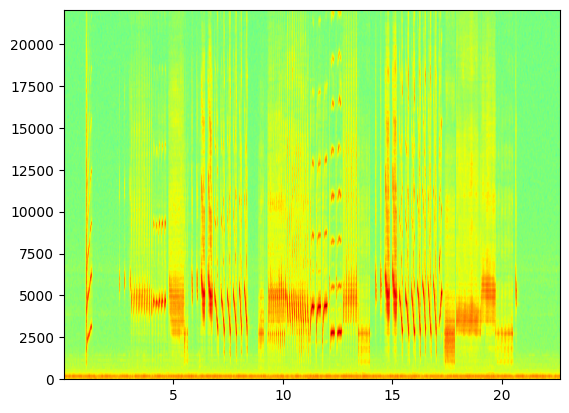

In [ ]:
filterSpec, t, freqs = wavToSpec(demoFile)

In [1]:
plt.figure(figsize = (100,10))

max_indices = np.argmax(filterSpec[:,:], axis=0)
plt.scatter(np.linspace(0,t[-1],num = len(max_indices)),freqs[max_indices], s = .5,color = 'red')

plt.imshow(filterSpec,aspect = 'auto',origin = 'lower',extent = [t[0],t[-1],freqs[0],freqs[-1]])


plt.show()

NameError: ignored

In [ ]:
spectrogram = filterSpec

from skimage.filters import threshold_otsu

# spectrogram2 = scipy.ndimage.gaussian_filter(spectrogram, sigma=2)
# Apply Otsu's thresholding
#threshold = threshold_otsu(spectrogram)
threshold = threshold_otsu(spectrogram)
# Find parts of the image that fall below threshold
time_axis_low_intensity_mask = np.all(spectrogram < threshold, axis=0)

# Find x-axis values where all y-axis values fall below the threshold
crossing_indices = np.where(time_axis_low_intensity_mask)[0]

silences = np.split(crossing_indices, np.where(np.diff(crossing_indices) != 1)[0]+1)

# Get the start and end indices of the silent regions
silence_starts = [region[0] for region in silences if region.size > 0]
silence_ends = [region[-1] for region in silences if region.size > 0]

In [ ]:
print(silence_starts)
print(silence_ends)

[0, 909, 1804, 1976, 2150, 2194, 2250, 2303, 2358, 2412, 2462, 2511, 2563, 2618, 2674, 2726, 2782, 2842, 2881, 2937, 3031, 3118, 3211, 3309, 3397, 3420, 3444, 3467, 3490, 3512, 3538, 3562, 3587, 3611, 3634, 3658, 3684, 3707, 3732, 3756, 3779, 3805, 3831, 3854, 3880, 3906, 3912, 3952, 3997, 4165, 4327, 4579, 4825, 5003, 5212, 5408, 5603, 5772, 5950, 6335, 6349, 6367, 6380, 6399, 6412, 6431, 6451, 6470, 6489, 6627, 6637, 6663, 6693, 6704, 6729, 6759, 6770, 6795, 6825, 6836, 6861, 6894, 6904, 6928, 6961, 6996, 7029, 7066, 7094, 7106, 7132, 7163, 7174, 7203, 7272, 7346, 7420, 7488, 7563, 7635, 7708, 7781, 7857, 7934, 8125, 8179, 8334, 8387, 8545, 8608, 8633, 8784, 8829, 8851, 9015, 9065, 9122, 9177, 9233, 9287, 9340, 9392, 9449, 9501, 9553, 9598, 9644, 9647, 9689, 9734, 9770, 9817, 9857, 9904, 9907, 10127, 10291, 10564, 10570, 10806, 10811, 10989, 11193, 11389, 11567, 11736, 11915, 12084, 12270, 12322, 12324, 12327, 12362, 12386, 12408, 12434, 12454, 12478, 12503, 12526, 12549, 12574, 1260

In [ ]:
plt.figure(figsize = (200,10))
plt.imshow(filterSpec,aspect = 'auto',origin = 'lower')

for x in silence_starts:
    plt.axvline(x=x, color='red', linestyle='--', linewidth=1.5)
for x in silence_ends:
    plt.axvline(x=x, color='blue', linestyle='--', linewidth=1.5)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

from skimage.metrics import structural_similarity as ssim

class SegmentData:
    def __init__(self, start, end, matrix_data):
        self.start = start
        self.end = end
        self.matrix_data = matrix_data

    def compare(self, other_data,masterTime,masterAudio,samplerate):
        if not isinstance(other_data, SegmentData):
            raise ValueError("Comparison object must be an instance of the Data class")

        # get data 1
        ind1 = np.where(np.logical_and(masterTime < self.end,masterTime > self.start))[0]
        ind2 = np.where(np.logical_and(masterTime < other_data.end,masterTime > other_data.start))[0]


        windowMs = 10
        stepMs = 10
        winSamp = int(windowMs*samplerate/1000)
        stepSamp = int(stepMs*samplerate/1000)
        print(len(masterAudio[ind1]))
        print(stepSamp)
        F1, f_names1 = ShortTermFeatures.feature_extraction(masterAudio[ind1], samplerate,winSamp ,stepSamp )
        F2, f_names2 = ShortTermFeatures.feature_extraction(masterAudio[ind2], samplerate, winSamp, stepSamp)


        dist = np.linalg.norm(np.mean(F1, axis=1)-np.mean(F2, axis=1))


        return dist
    def compare2(self,other_data,plotting = False): #GPT assist
      image1 = self.matrix_data
      image2 = other_data.matrix_data
      if image1.shape[1] < image2.shape[1]:
          diff_cols = image2.shape[1] - image1.shape[1]
          image1 = np.pad(image1, ((0, 0), (0, diff_cols)), mode='constant')
      elif image1.shape[1] > image2.shape[1]:
          diff_cols = image1.shape[1] - image2.shape[1]
          image2 = np.pad(image2, ((0, 0), (0, diff_cols)), mode='constant')

      if image1.shape != image2.shape:
          raise ValueError("Images should have the same dimensions after padding.")

      sigma = 3
      # blurImg1 =  scipy.ndimage.gaussian_filter(image1, sigma=sigma)/np.mean(image1)
      # blurImg2 =  scipy.ndimage.gaussian_filter(image2, sigma=sigma)/np.mean(image2)
      blurImg1 = image1
      blurImg2 = image2
      # euclidean_distance = np.linalg.norm(blurImg1 - blurImg2)
      # print(image1.size)
      nonzeroCount = (np.count_nonzero(blurImg1) + np.count_nonzero(blurImg2))/2
      euclidean_distance  = np.count_nonzero((blurImg1 != 0) & (blurImg2 != 0))/nonzeroCount


      if plotting:
        plt.subplot(2,2,1)
        plt.imshow(image1)
        plt.subplot(2,2,2)
        plt.imshow(image2)
        plt.subplot(2,2,3)
        plt.imshow(blurImg1)
        plt.subplot(2,2,4)
        plt.imshow(blurImg2)

      return euclidean_distance

    def compare3(self,other_data,freqs,plotting = False): #GPT assist
      image1 = self.matrix_data
      image2 = other_data.matrix_data
      if image1.shape[1] < image2.shape[1]:
          diff_cols = image2.shape[1] - image1.shape[1]
          image1 = np.pad(image1, ((0, 0), (0, diff_cols)), mode='constant')
      elif image1.shape[1] > image2.shape[1]:
          diff_cols = image1.shape[1] - image2.shape[1]
          image2 = np.pad(image2, ((0, 0), (0, diff_cols)), mode='constant')

      if image1.shape != image2.shape:
          raise ValueError("Images should have the same dimensions after padding.")

      max_indices1 = np.argmax(image1, axis=0)
      max_indices2 = np.argmax(image2, axis=0)
      dist = np.linalg.norm(freqs[max_indices1] - freqs[max_indices2])
      dist = dist*2/(np.linalg.norm(freqs[max_indices1])+ np.linalg.norm(freqs[max_indices2]))
      if plotting:
        plt.subplot(1,2,1)
        N = len(max_indices1)
        plt.imshow(image1,aspect = 'auto',extent = [0,N,freqs[0],freqs[-1]],origin = 'lower')
        plt.scatter(np.arange(N),freqs[max_indices1],s = .5,color = 'red')
        plt.subplot(1,2,2)
        plt.imshow(image2,aspect = 'auto',extent = [0,N,freqs[0],freqs[-1]],origin = 'lower')
        plt.scatter(np.arange(N),freqs[max_indices2],s = .5,color = 'red')


      return dist


In [ ]:
# generate array of data
# masterList = np.empty(len(silence_ends)-1, dtype=object)
masterList = []
for i in range(len(silence_ends)-1): # indexing issue
  startInd, endInd = silence_ends[i],silence_starts[i+1]

  thisData = spectrogram[:,startInd:endInd]
  thisSegment = SegmentData(t[startInd],t[endInd],thisData)
  # masterList[i] = thisSegment
  if endInd - startInd > 20:
    masterList.append(thisSegment)

masterList = np.array(masterList)

0.34146341463414637


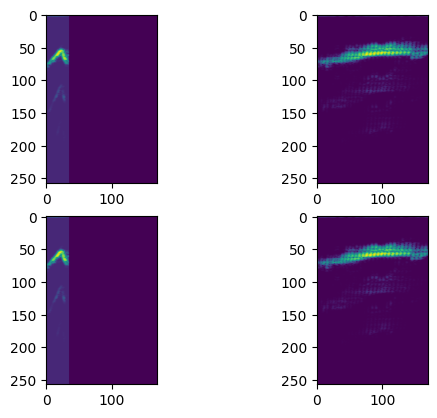

In [ ]:
A = 20
B = 23


dist = masterList[A].compare2(masterList[B],plotting = True)
print(dist)



0.23615210524798105


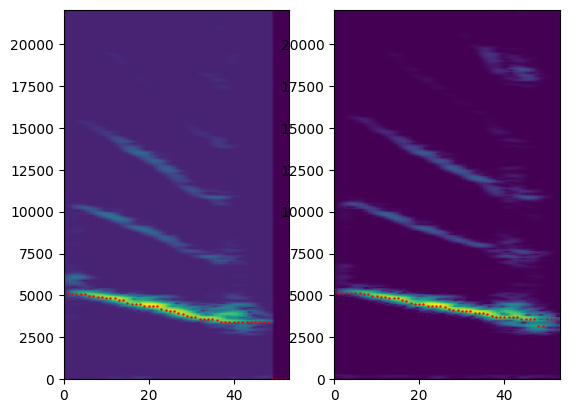

In [ ]:
A = 40
B = 41

dist = masterList[A].compare3(masterList[B],freqs,plotting = True)
print(dist)

1.3322107868225241
0.31932788815921087
0.25939503953567067
0.1840101131584597
0.17569069031732826
0.1795654955736349
0.17419981496648704
0.24073955164333294
0.17954880899517228
0.29528980758744006
0.2984304880568518
0.30292437669070044
0.18152857725837482
0.2628740087600506
0.8953550022607962
0.5356707777556907
0.208339140138822
0.24304361803083066
0.12322611358006746
0.8015870845152184
0.18589848799918915
1.0923378719867411
0.43179060088462645
0.5555362233537877
0.06239155671368022
0.1538280514782163
0.13611943934658932
0.34567778880413846
0.22458845899703964
1.434572110020499
0.8661867213060949
0.4109777451684948
0.6828397590555457
0.7792290069352085
0.550184415450082
0.2928751876503884
0.6310694847526834
0.3894159438274879
0.6716612212967799
0.23356352525189764
0.23615210524798105
0.20166629320588972
0.271723777443911
0.17595814970793314
0.1063777970748846
0.10281020771232684
0.13885577605101695
0.1371671736569502
1.1499919345850387
0.22443202235548912
0.1505319277089046
0.548295480

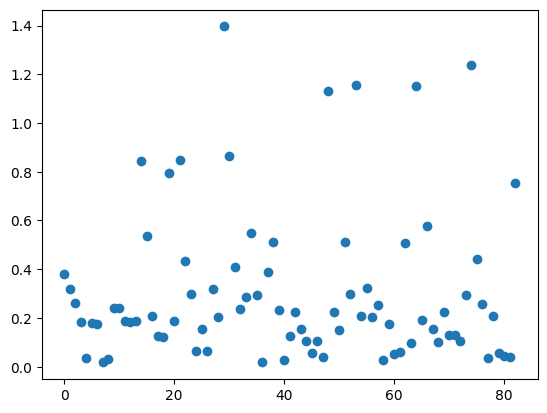

In [ ]:
currentNum = 0
labelList = [0]
distList = []
for i in range(1,len(masterList)):
  distance = masterList[i].compare3(masterList[i - 1],freqs)
  distance2 = masterList[i].compare3(masterList[i - 2],freqs)
  distance3 = masterList[i].compare3(masterList[i - 3],freqs)
  dist = min(distance,distance2,distance3)
  print(distance)
  if distance == 0:
      distance = masterList[i].compare2(masterList[i - 1],plotting = True)
      plt.show()
  distList.append(dist)

plt.scatter(np.arange(len(masterList)-1),distList)


##New Idea

[0. 0. 0. ... 0. 0. 0.]


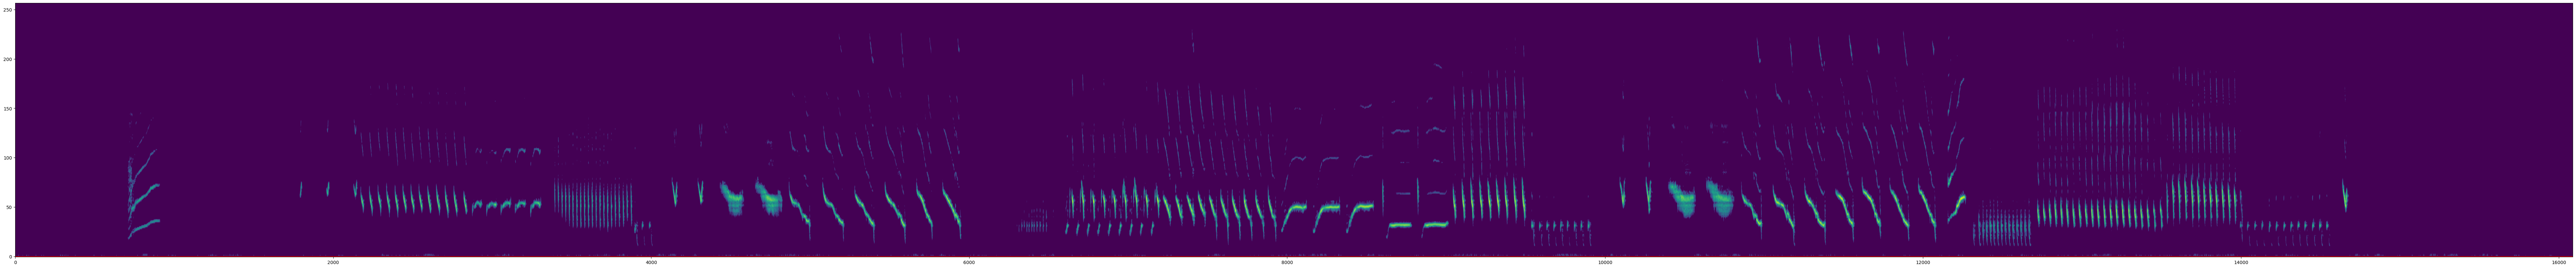

In [ ]:
plt.figure(figsize = (100,10))
spectrogram = filterSpec.copy()

spectrogram[spectrogram < 2] = 0
spectrogram[spectrogram < 0] = 1

# plt.imshow(spectrogram,aspect = 'auto')
# plt.show()
divMax = spectrogram.max(axis=0)
divMax[divMax == 0] = 1
normSpec = spectrogram / divMax
# plt.imshow(normSpec,aspect = 'auto')
# print(freqs[:, np.newaxis])
adapSpec =  normSpec* freqs[:, np.newaxis]
sums = np.median(adapSpec,axis = 0) #median check
plt.imshow(spectrogram,aspect = 'auto',origin = 'lower')

plt.scatter(np.arange(len(sums)),sums,s = .1, color = 'red')
print(sums)
plt.show()

[]


IndexError: ignored

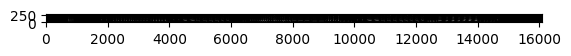

In [ ]:
from skimage import measure

data = filterSpec.copy()

def find_contours(int_data):

    # For every "color" in the dataset find the contour
    # by eliminating all the other colors one after each other and finding the
    # individual contours
    contours = []


    mask = np.zeros_like(int_data)
    mask[int_data > 0] = 1 # white object on black background


    # REPLACE in function
    c = measure.find_contours(mask)
    print(c)
    contours.append(c)

    return contours

fig, ax = plt.subplots()
ax.imshow(data, cmap=plt.cm.gray, origin="lower")

for contour in find_contours(data):
    contour = contour[0]
    ax.plot(contour[:, 1]-1, contour[:, 0]-1, linewidth=2)



plt.show()

[[32.27221391 28.94681111 24.87240377 ... 23.68056315 23.15459333
  28.59160371]
 [38.47244077 34.45731935 27.29263751 ... 34.07737162 37.83905205
  40.22748208]
 [30.49229289 29.86890531 28.73857195 ... 32.93957273 33.49123569
  32.53657921]
 ...
 [22.81366136 22.81360693 22.81356568 ... 22.81358346 22.81361643
  22.81364211]
 [22.81386063 22.81370957 22.8135972  ... 22.8136266  22.81358603
  22.81355803]
 [22.81378802 22.81374092 22.81366092 ... 22.81360367 22.8135868
  22.81357358]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[ 22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 

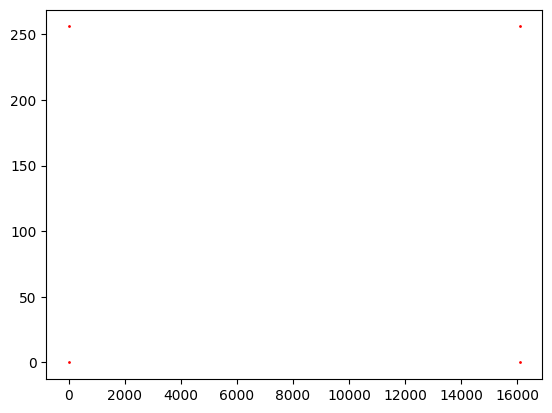

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the spectrogram image
spectrogram = filterSpec.copy()
# spectrogram = np.array(spectrogram, np.uint8)
spectrogram = spectrogram/np.max(spectrogram)*255
print(spectrogram)

# Threshold the image to create binary image
_, binary_image = cv2.threshold(spectrogram, 50, 255, cv2.THRESH_BINARY)
print(binary_image)
# plt.imshow(binary_image,aspect = 'auto',origin = 'lower')
# # Find contours in the binary image
binary_image = np.array(spectrogram, np.uint8)
print(np.unique(binary_image))

contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)
# Define a function to extract points from contours
def extract_points_from_contours(contours):
    points = []
    for contour in contours:
        for point in contour:
            points.append(point[0])  # Append the (x, y) coordinate of each point
    return np.array(points)

# Extract points from the contours
points = extract_points_from_contours(contours)

# # You can now use 'points' to represent the contours in time-frequency space.
# # 'points' is an array where each row represents a point in the (x, y) format.

print(points)
# # Optionally, you can visualize the points on top of the spectrogram
# plt.figure(figsize=(100, 20))
# plt.imshow(spectrogram, aspect = 'auto',origin = 'lower')
# plt.scatter(points[:, 0], points[:, 1], c='red', s=1)  # Plot the points in red
# plt.title('Spectrogram with Contours')
# plt.show()

plt.scatter(points[:, 0], points[:, 1], c='red', s=1)  # Plot the points in red


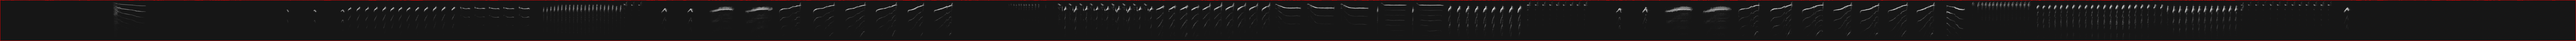

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Create a 2D NumPy array representing a grayscale image (replace this with your own array)
# For this example, I'll create a simple 100x100 gradient image.
image = filterSpec.copy()
# spectrogram = np.array(spectrogram, np.uint8)
image = image/np.max(image)*255
image = np.array(image, np.uint8)
# Apply adaptive thresholding
thresholded = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 5)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw contours on
contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Iterate through the contours and draw them on the image
for contour in contours:
    cv2.drawContours(contour_image, [contour], -1, (0, 0, 255), 2)

# Display the original image with contours
cv2_imshow(contour_image)


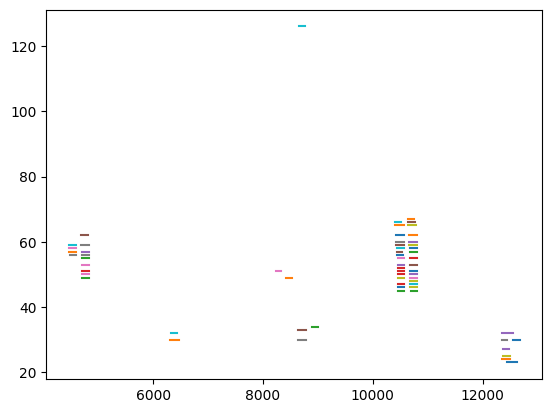

In [ ]:
import cv2
import numpy as np

image = filterSpec.copy()
# spectrogram = np.array(spectrogram, np.uint8)
image = image/np.max(image)*255
image = np.array(image, np.uint8)

gray = image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
# print(lines)
for line in lines:
    #print(line[0])
    x1, y1,x2,y2 = line[0]

    # a = np.cos(theta)
    # b = np.sin(theta)
    # x0 = a*rho
    # y0 = b*rho
    # x1 = int(x0 + 1000*(-b))
    # y1 = int(y0 + 1000*(a))
    # x2 = int(x0 - 1000*(-b))
    # y2 = int(y0 - 1000*(a))
    #cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    plt.plot([x1,x2],[y1,y2])

# cv2_imshow(img)